# Analysis Part 2: Confidence Interval

## Part 1:

Calculate the 90%, 95%, and 99% confidence intervals for the mean with $\sigma$ know.

$$
\bar{X} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

We will load the data from `"data/wine_dataset_assignment.csv"` and use the `alcohol` column for our analysis.

We will first get the $\bar{X}$, $\sigma$, and $n$ values.

Then we will get 32 random sample from the data and calculate the confidence intervals for each of the confidence levels mentioned above.

Finally, we will plot the confidence intervals along with the sample means.

In [1]:
DATA_DIR_PATH = "../data"
DATA_FILE_NAME = "wine_dataset_assignment.csv"

In [2]:
import pandas as pd

data = pd.read_csv(f"{DATA_DIR_PATH}/{DATA_FILE_NAME}")

In [3]:
# mean of the alcohol column
mean_alcohol = data["alcohol"].mean()
# standard deviation of the alcohol column
std_alcohol = data["alcohol"].std()
# number of samples in the alcohol column
n_alcohol = data["alcohol"].shape[0]
mean_alcohol, std_alcohol, n_alcohol

(np.float64(13.00061797752809), np.float64(0.8118265380058575), 178)

We will calculate the $Z_{\alpha/2}$ values for the confidence levels 90%, 95%, and 99%.

In [4]:
import scipy.stats as stats

confidence_levels = [0.90, 0.95, 0.99]
z_values = [stats.norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]
z_values

[np.float64(1.644853626951472),
 np.float64(1.959963984540054),
 np.float64(2.5758293035489004)]

In [5]:
# calculate the confidence intervals for 32 random samples
import numpy as np

sample_size = 32

confidence_intervals = {cl: [] for cl in confidence_levels}
sample_means = []

sample = data["alcohol"].sample(n=sample_size, replace=True)
sample_mean = sample.mean()
sample_means.append(sample_mean)

for cl, z in zip(confidence_levels, z_values):
    margin_of_error = z * (std_alcohol / np.sqrt(sample_size))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    confidence_intervals[cl].append((ci_lower, ci_upper))

In [6]:
# output the confidence intervals
confidence_intervals

{0.9: [(np.float64(12.559881245657897), np.float64(13.031993754342105))],
 0.95: [(np.float64(12.51465912406728), np.float64(13.07721587593272))],
 0.99: [(np.float64(12.426275052681017), np.float64(13.165599947318984))]}

In [7]:
# print them in the format: Confidence Level: (Lower Bound, Upper Bound)
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    print(f"Confidence Level {cl*100}%: ({ci[0]}, {ci[1]})")

Confidence Level 90.0%: (12.559881245657897, 13.031993754342105)
Confidence Level 95.0%: (12.51465912406728, 13.07721587593272)
Confidence Level 99.0%: (12.426275052681017, 13.165599947318984)


In [8]:
import matplotlib.pyplot as plt

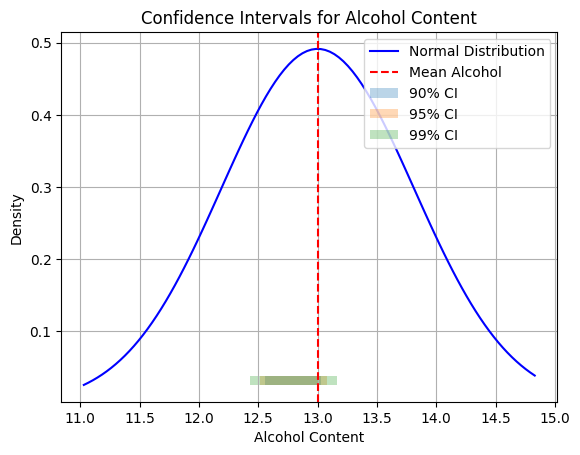

In [9]:
# plot the confidence intervals on a graph with a normal distribution of the alcohol data
x = np.linspace(data["alcohol"].min(), data["alcohol"].max(), 100)
y = stats.norm.pdf(x, mean_alcohol, std_alcohol)
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI")
plt.title("Confidence Intervals for Alcohol Content")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part 2:

Now we will do the same as above but with $\sigma$ unknown.

$$
\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

In [10]:
# take a sample size of 16 (assume normal distribution)
sample_size_unknown = 16

confidence_intervals_unknown = {cl: [] for cl in confidence_levels}
sample_means_unknown = []

sample_unknown = data["alcohol"].sample(n=sample_size_unknown, replace=True)
sample_mean_unknown = sample_unknown.mean()
sample_means_unknown.append(sample_mean_unknown)
sample_std_unknown = sample_unknown.std()

for cl in confidence_levels:
    t_value = stats.t.ppf(1 - (1 - cl) / 2, df=sample_size_unknown - 1)
    margin_of_error_unknown = t_value * (sample_std_unknown / np.sqrt(sample_size_unknown))
    ci_lower_unknown = sample_mean_unknown - margin_of_error_unknown
    ci_upper_unknown = sample_mean_unknown + margin_of_error_unknown
    confidence_intervals_unknown[cl].append((ci_lower_unknown, ci_upper_unknown))

In [11]:
# print the confidence intervals for unknown sigma (min, max)
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    print(f"Confidence Level {cl*100}% (Unknown σ): ({ci[0]}, {ci[1]})")

Confidence Level 90.0% (Unknown σ): (12.242298512842272, 13.156451487157728)
Confidence Level 95.0% (Unknown σ): (12.143637700341364, 13.255112299658636)
Confidence Level 99.0% (Unknown σ): (11.931072384463272, 13.467677615536727)


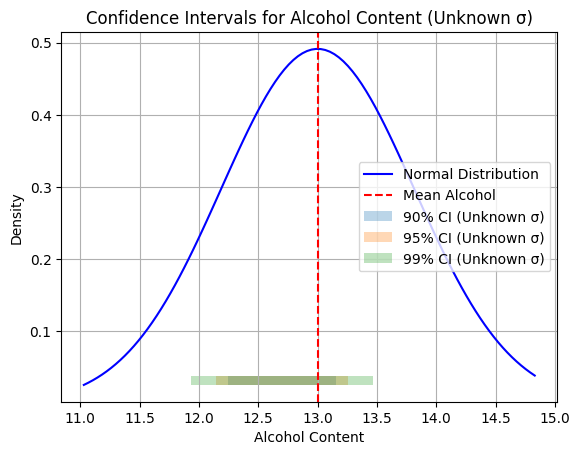

In [12]:
# plot the confidence intervals for unknown sigma on a graph with a normal distribution of the alcohol data
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI (Unknown σ)")
plt.title("Confidence Intervals for Alcohol Content (Unknown σ)")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()

In [13]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# ==============================================================================
# SECTION 3: Confidence Interval for Mean (Unknown Sigma, Small Sample)
# Requirements:
# 1. Unknown population standard deviation (use sample std 's').
# 2. Small sample size (n <= 16).
# 3. Assume Normal Distribution (use T-Distribution).
# 4. Confidence Levels: 90%, 95%, 99%.
# 5. Must calculate and print the length of the interval.
# [cite_start]Source [cite: 12, 13, 14]
# ==============================================================================

print("-" * 60)
print("SECTION 3: CI for Mean (Unknown Sigma, Small Sample n=16)")
print("-" * 60)

# [cite_start]1. Randomly sample 16 observations (n <= 16 as required) [cite: 12]
# [cite_start]We use a different random_state to ensure observations are different from previous sections [cite: 13]
n_small = 16
sample_small = data["alcohol"].sample(n=n_small, replace=False, random_state=101)

# 2. Calculate Sample Statistics
# We use sample standard deviation (s) because population sigma is unknown
x_bar_small = sample_small.mean()
s_small = sample_small.std(ddof=1)  # ddof=1 for unbiased estimator (sample variance)

print(f"Sample Size (n): {n_small}")
print(f"Sample Mean (x_bar): {x_bar_small:.4f}")
print(f"Sample Std Dev (s): {s_small:.4f}\n")

confidence_levels = [0.90, 0.95, 0.99]

for cl in confidence_levels:
    alpha = 1 - cl
    df = n_small - 1  # Degrees of freedom for T-distribution
    
    # [cite_start]Calculate critical T-value [cite: 14]
    # ppf takes the cumulative probability (1 - alpha/2) for a two-tailed test
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    # Calculate Margin of Error
    # Formula: t * (s / sqrt(n))
    margin_of_error = t_critical * (s_small / np.sqrt(n_small))
    
    # Calculate Bounds
    lower_bound = x_bar_small - margin_of_error
    upper_bound = x_bar_small + margin_of_error
    
    # [cite_start]Calculate the size/length of the confidence interval [cite: 14]
    interval_length = upper_bound - lower_bound
    
    print(f"Confidence Level: {int(cl*100)}%")
    print(f"Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print(f"Interval Length: {interval_length:.4f}")
    print("." * 30)



------------------------------------------------------------
SECTION 3: CI for Mean (Unknown Sigma, Small Sample n=16)
------------------------------------------------------------
Sample Size (n): 16
Sample Mean (x_bar): 13.1812
Sample Std Dev (s): 0.7520

Confidence Level: 90%
Interval: (12.8517, 13.5108)
Interval Length: 0.6592
..............................
Confidence Level: 95%
Interval: (12.7805, 13.5820)
Interval Length: 0.8014
..............................
Confidence Level: 99%
Interval: (12.6273, 13.7352)
Interval Length: 1.1080
..............................


In [14]:

# ==============================================================================
# SECTION 4: Confidence Interval for Proportion
# Requirements:
# 1. Create a ratio/proportion on a variable (e.g., % of wines > 13.0 alcohol).
# 2. Confidence Levels: 90%, 95%, 99%.
# 3. Must calculate and print the length of the interval.
# [cite_start]Source [cite: 15, 16, 17]
# ==============================================================================

print("\n" + "-" * 60)
print("SECTION 4: CI for Proportion")
print("-" * 60)

# 1. Define the Condition for the Proportion
# We will check the proportion of wines with high alcohol content (> 13.5)
threshold = 13.5
print(f"Condition: Wines with Alcohol content > {threshold}")

# 2. Take a random sample for this analysis
# While the text mentions 16 for section 3, proportions generally need larger samples 
# for valid approximation. We will use n=50 here to simulate a distinct study.
n_prop = 50
sample_prop_data = data["alcohol"].sample(n=n_prop, replace=False, random_state=202)

# 3. Calculate Sample Proportion (p_hat)
# Count how many wines meet the condition (Successes)
num_successes = (sample_prop_data > threshold).sum()
p_hat = num_successes / n_prop

print(f"Sample Size (n): {n_prop}")
print(f"Number of Successes: {num_successes}")
print(f"Sample Proportion (p_hat): {p_hat:.4f}")

# Check assumption: n*p and n*(1-p) should generally be > 10 for normal approx
if n_prop * p_hat < 10 or n_prop * (1 - p_hat) < 10:
    print("(Note: Sample size/proportion might be small for perfect Normal approximation)")

print("")

for cl in confidence_levels:
    alpha = 1 - cl
    
    # For proportions, we use the Z-distribution (Normal)
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    # Calculate Standard Error for Proportion
    # Formula: sqrt( (p_hat * (1 - p_hat)) / n )
    standard_error = np.sqrt((p_hat * (1 - p_hat)) / n_prop)
    
    # Calculate Margin of Error
    margin_of_error_prop = z_critical * standard_error
    
    # Calculate Bounds
    lower_bound_p = p_hat - margin_of_error_prop
    upper_bound_p = p_hat + margin_of_error_prop
    
    # Clip bounds to be between 0 and 1 (since probability cannot exceed these)
    lower_bound_p = max(0.0, lower_bound_p)
    upper_bound_p = min(1.0, upper_bound_p)
    
    # [cite_start]Calculate the size/length of the confidence interval [cite: 17]
    interval_length_p = upper_bound_p - lower_bound_p
    
    print(f"Confidence Level: {int(cl*100)}%")
    print(f"Interval: ({lower_bound_p:.4f}, {upper_bound_p:.4f})")
    print(f"Interval Length: {interval_length_p:.4f}")
    print("." * 30)


------------------------------------------------------------
SECTION 4: CI for Proportion
------------------------------------------------------------
Condition: Wines with Alcohol content > 13.5
Sample Size (n): 50
Number of Successes: 16
Sample Proportion (p_hat): 0.3200

Confidence Level: 90%
Interval: (0.2115, 0.4285)
Interval Length: 0.2170
..............................
Confidence Level: 95%
Interval: (0.1907, 0.4493)
Interval Length: 0.2586
..............................
Confidence Level: 99%
Interval: (0.1501, 0.4899)
Interval Length: 0.3399
..............................
